## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

>**Used Datasets**
1. ab_data.csv
2. countries.csv


<a id='probability'></a>
#### Part I - Probability
To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Finding no of rows
print('No of Rows ->',df.shape[0])

No of Rows -> 294478


c. The number of unique users in the dataset.

In [4]:
#Finding no of unique users in dataset
print('No of Unique Users ->',df.user_id.nunique())

No of Unique Users -> 290584


d. The proportion of users converted.

In [5]:
#Proportion of users converted
con_mean = df['converted'].mean()
print('Proportion of users converted -> ', con_mean)

Proportion of users converted ->  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Checking for 2 specific conditions which may lead to inaccurate analysis and saving them to p1 and p2 resp 
p1 = df[(df.group == 'treatment') & (df.landing_page == 'old_page')]
p2 = df[(df.group == 'control') & (df.landing_page == 'new_page')]

#Adding lenght of p1 and p2 for total no of times new_page and treatment don't match.
p_sum = len(p1) + len(p2)
#Printing sum of lenght of p1 and p2 for total no of times new_page and treatment don't match.
print('No of times the new_page and treatment dont match. ->',p_sum)

No of times the new_page and treatment dont match. -> 3893


f. Do any of the rows have missing values?

In [7]:
#Checking null values
print('No of missing values->',df.isnull().sum())

No of missing values-> user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Appending both p1 and p2
drp = p2.append(p1).index
#Calling p1 and p2 from "1.e" which include entries with mismatch data and dropping them
df.drop(drp, inplace = True)

In [9]:
#Creating new data frame and copying entries from df
df2 = df

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#No of unique user_ids in dataframe
print('No of Unique user ids ->',len(df2.user_id.unique()))

No of Unique user ids -> 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#No of user_ids in dataframe
print('No of User Ids ->',df2.shape[0])

No of User Ids -> 290585


There are in total 290585 rows and there are 290584 unique rows which proves that there is one duplicate row

c. What is the row information for the repeat **user_id**? 

Checking for duplicate row

In [13]:
#Locating the duplicate row using user_id and returning user_id
dupl = df2[df2['user_id'].duplicated()]['user_id']
print('Duplicate Row ->',dupl)

Duplicate Row -> 2893    773192
Name: user_id, dtype: int64


The user id '773192' is duplicated

In [14]:
#Returning the row using "loc"
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

Dropping the duplicate row

In [15]:
df2.drop(2893,inplace = True) #dropping duplicate via index value

Confirming no duplicates

In [16]:
#Confirming duplicates
print('No of duplicate rows ->',df2[df2['user_id'].duplicated()]['user_id'].count())

No of duplicate rows -> 0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#Proportion of users converted
np.mean(df2['converted'])

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#Proportion of users converted who were in control group
mean_control = (df2.query('group == "control" and converted == "1"').shape[0] / df2.query('group == "control"').shape[0])
mean_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#Proportion of users converted who were in treatment group
mean_treat=((df2.query('group == "treatment" and converted == "1"').shape[0] / df2.query('group == "treatment"').shape[0]))
mean_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#Proportion of user received a new page
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**RESULTS**

There are **290584** Unique users

>**From the above findings I can conclusively state the following facts:**
1. Probability of an individual converting regardless of the page they receive: **0.11959708724499628** 
2. Probability that an individual was in *Control* group and converting: **0.1203863045004612**
3. Probability that an individual was in *Treatment* group and converting: **0.11880806551510564**
4. Probability that an individual received the new page: **0.5000619442226688**

Also, the findings are not sufficient enough to conclude that the new treatment page leads to more conversions since the probability of conversion for both the groups is similar and not enough for any conclusive decision yet.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$
H_0 : p_{new} \leq  p_{old}  \\
H_1 : p_{new} > p_{old}
$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#conversion rate of P_new
p_new = df2['converted'].mean()
print('Conversion rate for p_new under the null -> ',p_new)

Conversion rate for p_new under the null ->  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#conversion rate of P_old
p_old = df2['converted'].mean()
print('Conversion rate for p_old under the null -> ',p_old)

Conversion rate for p_old under the null ->  0.11959708724499628


In [23]:
#Difference between p_new and p_old
p_new - p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
#number of individuals in the treatment group
n_new = df[(df.landing_page == 'new_page')].shape[0]
print('n_new -> ',n_new)

n_new ->  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
#number of individuals in the control group
n_old = df[(df.landing_page == 'old_page')].shape[0]
print('n_old -> ',n_old)

n_old ->  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice(2, n_new , [(1 - con_mean), con_mean])
new_page_converted

array([0, 0, 0, ..., 0, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice(2, n_old ,[(1 - con_mean), con_mean])
old_page_converted

array([0, 0, 0, ..., 1, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#difference in mean
obs_diff = np.mean(new_page_converted) - np.mean(old_page_converted)
obs_diff

0.00034422154963137386

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
#Sampling distribution of p_old and p_new simulation
p_diffs = []
np.random.seed(10)
for i in range(10000):
    new_page_converted = np.random.choice(2,n_new, [(1 - con_mean), con_mean])
    old_page_converted = np.random.choice(2,n_old, [(1 - con_mean), con_mean])
    p_diffs.append(np.mean(new_page_converted) - np.mean(old_page_converted))

In [30]:
#Converting p_diffs to numpy array
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00125257,  0.00022042,  0.00158278, ..., -0.00022057,
        0.00185826, -0.0004537 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

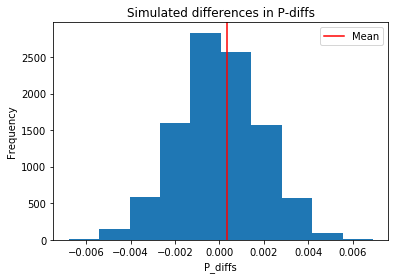

In [31]:
#Plotting Histogram
plt.hist(p_diffs);
#Title, Xlabel, Ylabel and mean line and legend
plt.title("Simulated differences in P-diffs");
plt.xlabel('P_diffs');
plt.ylabel('Frequency');
plt.axvline(x= obs_diff, color='r', label='Mean');
plt.legend();


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
#Calculating p-value

ob_diff = mean_treat - mean_control

pval = np.mean(p_diffs > ob_diff)
print('P - value ->',pval)

P - value -> 0.8069


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j**. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?



**Conclusion from the Analysis** : 
>P - value -> **0.8069** which way higher than accepted $\alpha$ value of **0.05**. Hence, we have failed to **Reject the Null Hypothesis** as P-value is the probability of getting our statistic or a more extreme value if the null is true. Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a different distribution than the null. When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()
convert_old , convert_new , n_old , n_new 

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
#From documentation
(z_score,Pval) = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative = 'smaller')
z_score,Pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* **A Z-score is a numerical measurement used in statistics of a value's relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean.**
* **P - value is close enough with the P - value from J from which I can conclude that *We Failed to Reject the Null Hypothesis***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [35]:
#Checking values in df2
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**In this scenario there happen to be only two possible outcome which is the the feature of Logistic Regression. Hence, I'll be performing Logistic Regression in this case**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#Creating dummy variable columns for landing page
df2['intercept'] = 1;
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
#Using Logit function for Logistic regression
log_mod = sm.Logit(df2['converted'], df2[['intercept' ,'ab_page' ]])
result = log_mod.fit();


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
# result.summary2() is used inplace of result.summary() to avoid AttributeError: module 'scipy.stats' has no attribute 'chisqprob'
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-05-18 04:01 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [39]:
#Converting to proportional value
1/np.exp(result.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The Pval differs from Part II  because in Part II we considered our Null Hypothesis and Alternate Hypothesis to be:**

$$H_0: p_{new} <= p_{old}$$
$$H_1: p_{new} > p_{old}$$

**Whereas, in Logistic Regression  our Null Hypothesis and Alternate Hypothesis were:**

$$H_0: p_{new} = p_{old}$$
$$H_1: p_{new} != p_{old}$$

Because it returns values in the range of 0 to 1

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Since we have not yet found conclusive analysis considering additional factors might influence in the proportions of conversions. Considering additional factors may outcome as a disadvantage also since we dont know what it may lead to**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#Reading countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
#New Dataframe from joining 'df_country' and 'df2' using index as "user_id"
df_new = df_country.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
#Creating dummies 
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [43]:
#US as the baseline
df_new['intercept'] = 1
lm = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
result1 = lm.fit();
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-05-18 04:01 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [44]:
#Converting to proportional value 
ca = 1/np.exp(result1.params[1]);
uk = 1/np.exp(result1.params[2]);

print('CA -> ',ca) , print('UK -> ',uk)

CA ->  1.0416468468924358
UK ->  0.9901327298167878


(None, None)

In [45]:
#Creating new columns from columns from countries and ab_page by their multiplication
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page']
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US,CA_ab_page,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
#US as the baseline
lm1 = logit3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'US_ab_page', 'UK_ab_page','CA_ab_page']])
result2 = lm1.fit();
result2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.000      
Dependent Variable:   converted          AIC:                212782.6602
Date:                 2020-05-18 04:01   BIC:                212846.1381
No. Observations:     290584             Log-Likelihood:     -1.0639e+05
Df Model:             5                  LL-Null:            -1.0639e+05
Df Residuals:         290578             LLR p-value:        0.19199    
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
            Coef.    Std.Err.      z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
intercept  -1.9865      0.0096 -206.3440 0.0000      -2.0053     -1.9676
ab_page    -0.0193 306185.1023   -0.0000 1.0000 -600111.7924 600111.7538
CA         -0.0175      0.0377   -0.4652 0.6418      -0.0914      0.0563
UK         -0.0057      0.0188   -0.3057 0.7598      -0.0426      0.0311
US_ab_page -0.0013 306185.1023   -0.0000 1.0000 -600111.7743 600111.7718
UK_ab_page  0.0301 306185.1023    0.0000 1.0000 -600111.7429 600111.8032
CA_ab_page -0.0482 306185.1023   -0.0000 1.0000 -600111.8212 600111.7249
========================================================================

"""

### Conclusion
None of the above variables have statistically significance, Hence we fail to reject the Null Hypothesis and Conclude that there is no relation and proof to indicate to predict the user converts to new page or where he keeps using the old page.
> But what I did found conclusive enough that:
* Users from CA are 1.042 times more likely to convert from US
* Users from UK are 0.990 times more likely to convert from US
* For 1 unit decrease in ab_page,with other variable constant, Conversion rate increases  by 1.015 times

### Limitation 
The Provided information doesnt seems to be enough for a conclusive result from  the analysis. Also instead of dropping the columns for base in Logistic Regression. I havent used them and just kept

### References:
1. [stats.proportions_ztest](https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-z-test-proportions/v/hypothesis-test-for-difference-in-proportions-example)  
2. [Interpret P_value](https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests)
3. [Z_score](https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/z-score-introduction)
4. [result.summary() Error](https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob)

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0